# Analyzing RC Bridges under Seismic Excitations and Scouring using Machine Learning by Python


### This is the project of analuzing a dataset including some features of "RC Bridges " multi-hazard analysis (earthquake-scour) . The purpose is to identify their class/category/cluster by supervised or unsupervised Machine Learning algorithms and models.

### >>>Supervised:                                                        
#### i ) KNN
#### ii) Decision Tree                                                      
#### iii) Logistic Regression                                       
#### iv) SVM 
#### v) ANN
### >>>Unsupervised
#### vi) K-Means
#### vii ) Hierarchical
#### viii ) DBSCAN

## Conducted by Aref Jozi on Jan & Feb 2024
## Coding by Aref Jozi / Data Collecting by Ali Raoof Mehrpour Hosseini / Supervised by Mehran Seyed Razzaghi


## This ipynb file is using : i ) KNN

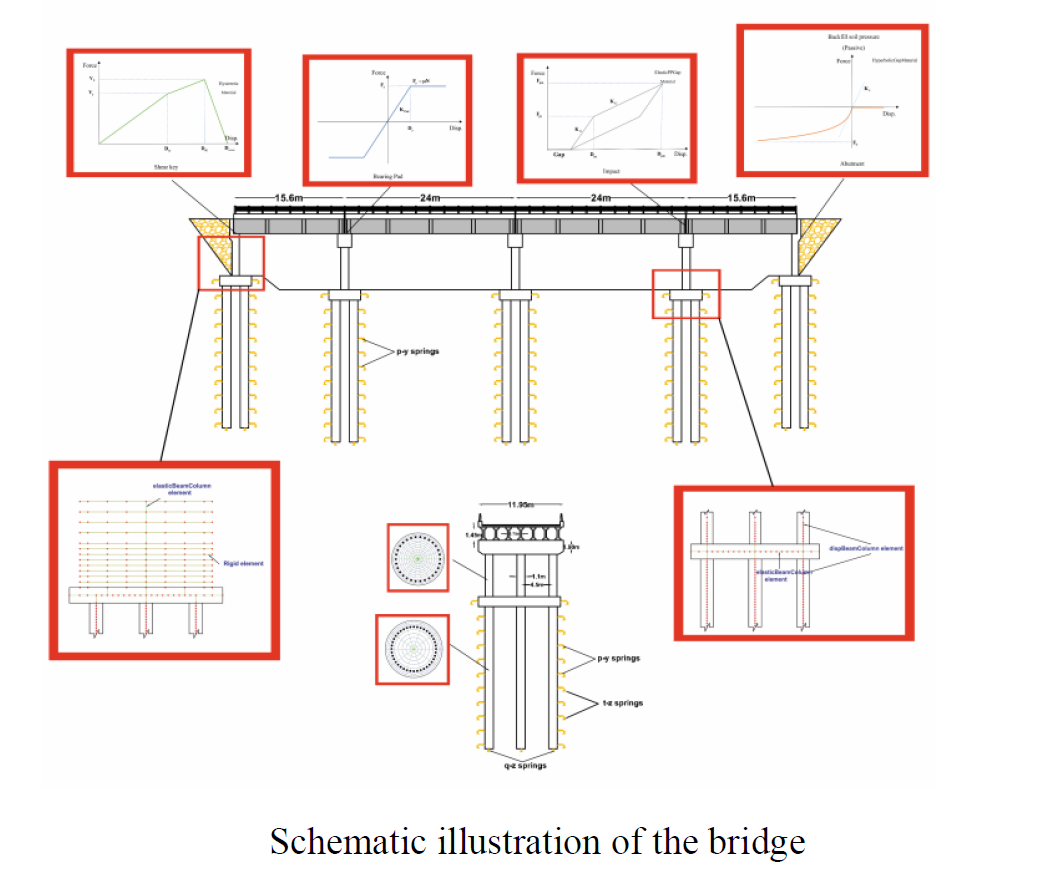

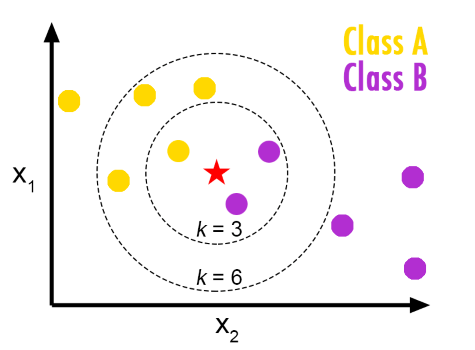

# Importing important and primary libraries:

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data from CSV file:

In [2]:
# the address of the file may differ on different systems
dfi = pd.read_csv("e:/RCBridgeDataSetbyArefJozi.csv")

# Deep-dive in the dataset:

In [3]:
dfi.head()

,faultindex,pgalong,pgatran,sat11,sat12,phi,scourdepthp1,scourdepthp2,scourdepthp3,numeliminatedspringsp1,numeliminatedspringsp2,numeliminatedspringsp3,absmaxstrainconcretecompression,absmaxstrainrebartension,damageindex
0,1,0.286,0.348,0.32877,0.49779,30,0.00,0.00,0.00,0,0,0,0.000839,0.000760,0
1,1,0.286,0.348,0.32877,0.49779,30,2.75,2.00,2.25,11,8,9,0.000869,0.000802,0
2,1,0.286,0.348,0.32877,0.49779,30,3.25,1.75,2.50,13,7,10,0.000876,0.000796,0
3,1,0.286,0.348,0.32877,0.49779,30,2.25,1.00,2.00,9,4,8,0.000861,0.000764,0
4,1,0.286,0.348,0.32877,0.49779,30,2.00,4.00,4.00,8,16,16,0.000886,0.000858,0


In [4]:
dfi.tail()

,faultindex,pgalong,pgatran,sat11,sat12,phi,scourdepthp1,scourdepthp2,scourdepthp3,numeliminatedspringsp1,numeliminatedspringsp2,numeliminatedspringsp3,absmaxstrainconcretecompression,absmaxstrainrebartension,damageindex
1195,2,0.10094,0.069,0.08846,0.11453,40,2.50,1.75,2.25,10,7,9,0.000195,0.000014,0
1196,2,0.10094,0.069,0.08846,0.11453,40,1.00,1.00,2.00,4,4,8,0.000191,0.000011,0
1197,2,0.10094,0.069,0.08846,0.11453,40,2.00,3.25,1.75,8,13,7,0.000190,0.000017,0
1198,2,0.10094,0.069,0.08846,0.11453,40,1.75,2.00,2.75,7,8,11,0.000195,0.000016,0
1199,2,0.10094,0.069,0.08846,0.11453,40,4.00,4.00,4.00,16,16,16,0.000202,0.000022,0


In [5]:
print ("Shape of dataset: ", dfi.shape)

Shape of dataset:  (1200, 15)


In [6]:
dfi.isnull().any()

faultindex                         False
pgalong                            False
pgatran                            False
sat11                              False
sat12                              False
phi                                False
scourdepthp1                       False
scourdepthp2                       False
scourdepthp3                       False
numeliminatedspringsp1             False
numeliminatedspringsp2             False
numeliminatedspringsp3             False
absmaxstrainconcretecompression    False
absmaxstrainrebartension           False
damageindex                        False
dtype: bool

In [7]:
# As result : We have 14 features and 1 target with no empty cell => it's OK
data_types = dfi.dtypes

print(data_types)

faultindex                           int64
pgalong                            float64
pgatran                            float64
sat11                              float64
sat12                              float64
phi                                  int64
scourdepthp1                       float64
scourdepthp2                       float64
scourdepthp3                       float64
numeliminatedspringsp1               int64
numeliminatedspringsp2               int64
numeliminatedspringsp3               int64
absmaxstrainconcretecompression    float64
absmaxstrainrebartension           float64
damageindex                          int64
dtype: object


In [8]:
dfi ['damageindex'].value_counts()

0    982
3    131
1     49
2     38
Name: damageindex, dtype: int64

array([[<AxesSubplot:title={'center':'faultindex'}>,
        <AxesSubplot:title={'center':'pgalong'}>,
        <AxesSubplot:title={'center':'pgatran'}>,
        <AxesSubplot:title={'center':'sat11'}>],
       [<AxesSubplot:title={'center':'sat12'}>,
        <AxesSubplot:title={'center':'phi'}>,
        <AxesSubplot:title={'center':'scourdepthp1'}>,
        <AxesSubplot:title={'center':'scourdepthp2'}>],
       [<AxesSubplot:title={'center':'scourdepthp3'}>,
        <AxesSubplot:title={'center':'numeliminatedspringsp1'}>,
        <AxesSubplot:title={'center':'numeliminatedspringsp2'}>,
        <AxesSubplot:title={'center':'numeliminatedspringsp3'}>],
       [<AxesSubplot:title={'center':'absmaxstrainconcretecompression'}>,
        <AxesSubplot:title={'center':'absmaxstrainrebartension'}>,
        <AxesSubplot:title={'center':'damageindex'}>, <AxesSubplot:>]],
      dtype=object)

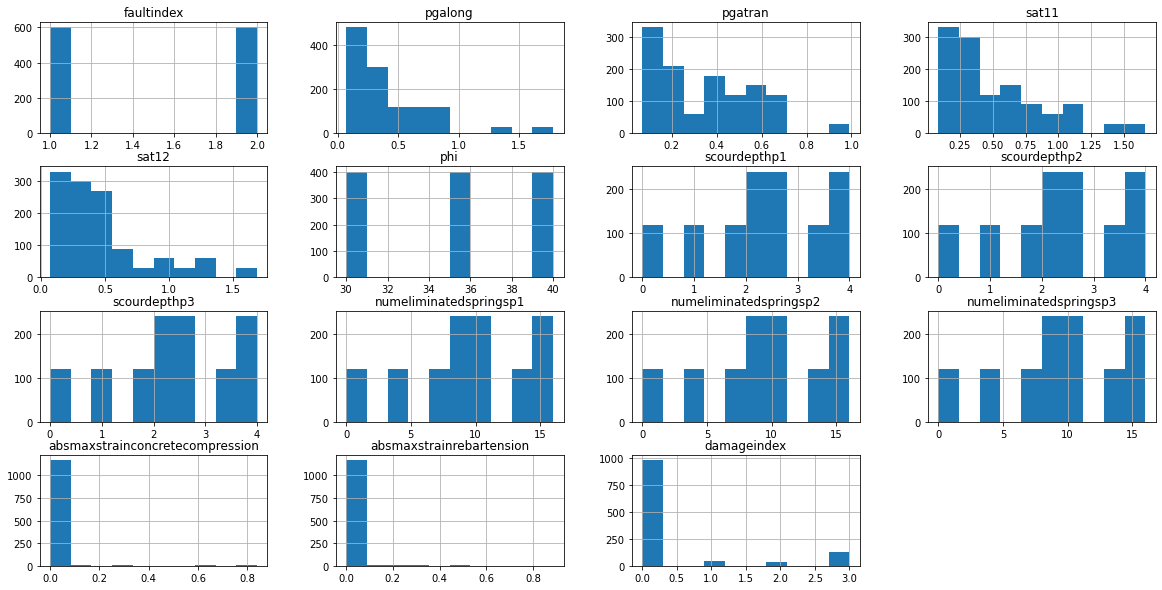

In [14]:
dfi.hist(figsize=(20,10))

In [34]:
dfi.describe()

,faultindex,pgalong,pgatran,sat11,sat12,phi,scourdepthp1,scourdepthp2,scourdepthp3,numeliminatedspringsp1,numeliminatedspringsp2,numeliminatedspringsp3,absmaxstrainconcretecompression,absmaxstrainrebartension,damageindex
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,1.500000,0.415013,0.355819,0.511943,0.483070,35.000000,2.350000,2.350000,2.350000,9.400000,9.400000,9.400000,0.015624,0.015397,0.431667
std,0.500208,0.347617,0.215721,0.373748,0.365216,4.084185,1.195278,1.195278,1.195278,4.781114,4.781114,4.781114,0.075035,0.072462,0.982073
min,1.000000,0.070830,0.069000,0.088460,0.072070,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000129,0.000000,0.000000
25%,1.000000,0.189625,0.158892,0.240393,0.223765,30.000000,1.750000,1.750000,1.750000,7.000000,7.000000,7.000000,0.000436,0.000238,0.000000
50%,1.500000,0.309300,0.334900,0.380045,0.378835,35.000000,2.375000,2.375000,2.375000,9.500000,9.500000,9.500000,0.000871,0.000818,0.000000
75%,2.000000,0.566942,0.538052,0.710035,0.565998,40.000000,3.250000,3.250000,3.250000,13.000000,13.000000,13.000000,0.002386,0.003191,0.000000
max,2.000000,1.779420,0.990240,1.658880,1.688240,40.000000,4.000000,4.000000,4.000000,16.000000,16.000000,16.000000,0.839528,0.886159,3.000000


In [35]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   faultindex                       1200 non-null   int64  
 1   pgalong                          1200 non-null   float64
 2   pgatran                          1200 non-null   float64
 3   sat11                            1200 non-null   float64
 4   sat12                            1200 non-null   float64
 5   phi                              1200 non-null   int64  
 6   scourdepthp1                     1200 non-null   float64
 7   scourdepthp2                     1200 non-null   float64
 8   scourdepthp3                     1200 non-null   float64
 9   numeliminatedspringsp1           1200 non-null   int64  
 10  numeliminatedspringsp2           1200 non-null   int64  
 11  numeliminatedspringsp3           1200 non-null   int64  
 12  absmaxstrainconcrete

array([[<AxesSubplot:xlabel='faultindex', ylabel='faultindex'>,
        <AxesSubplot:xlabel='pgalong', ylabel='faultindex'>,
        <AxesSubplot:xlabel='pgatran', ylabel='faultindex'>,
        <AxesSubplot:xlabel='sat11', ylabel='faultindex'>,
        <AxesSubplot:xlabel='sat12', ylabel='faultindex'>,
        <AxesSubplot:xlabel='phi', ylabel='faultindex'>,
        <AxesSubplot:xlabel='scourdepthp1', ylabel='faultindex'>,
        <AxesSubplot:xlabel='scourdepthp2', ylabel='faultindex'>,
        <AxesSubplot:xlabel='scourdepthp3', ylabel='faultindex'>,
        <AxesSubplot:xlabel='numeliminatedspringsp1', ylabel='faultindex'>,
        <AxesSubplot:xlabel='numeliminatedspringsp2', ylabel='faultindex'>,
        <AxesSubplot:xlabel='numeliminatedspringsp3', ylabel='faultindex'>,
        <AxesSubplot:xlabel='absmaxstrainconcretecompression', ylabel='faultindex'>,
        <AxesSubplot:xlabel='absmaxstrainrebartension', ylabel='faultindex'>,
        <AxesSubplot:xlabel='damageindex', ylabel=

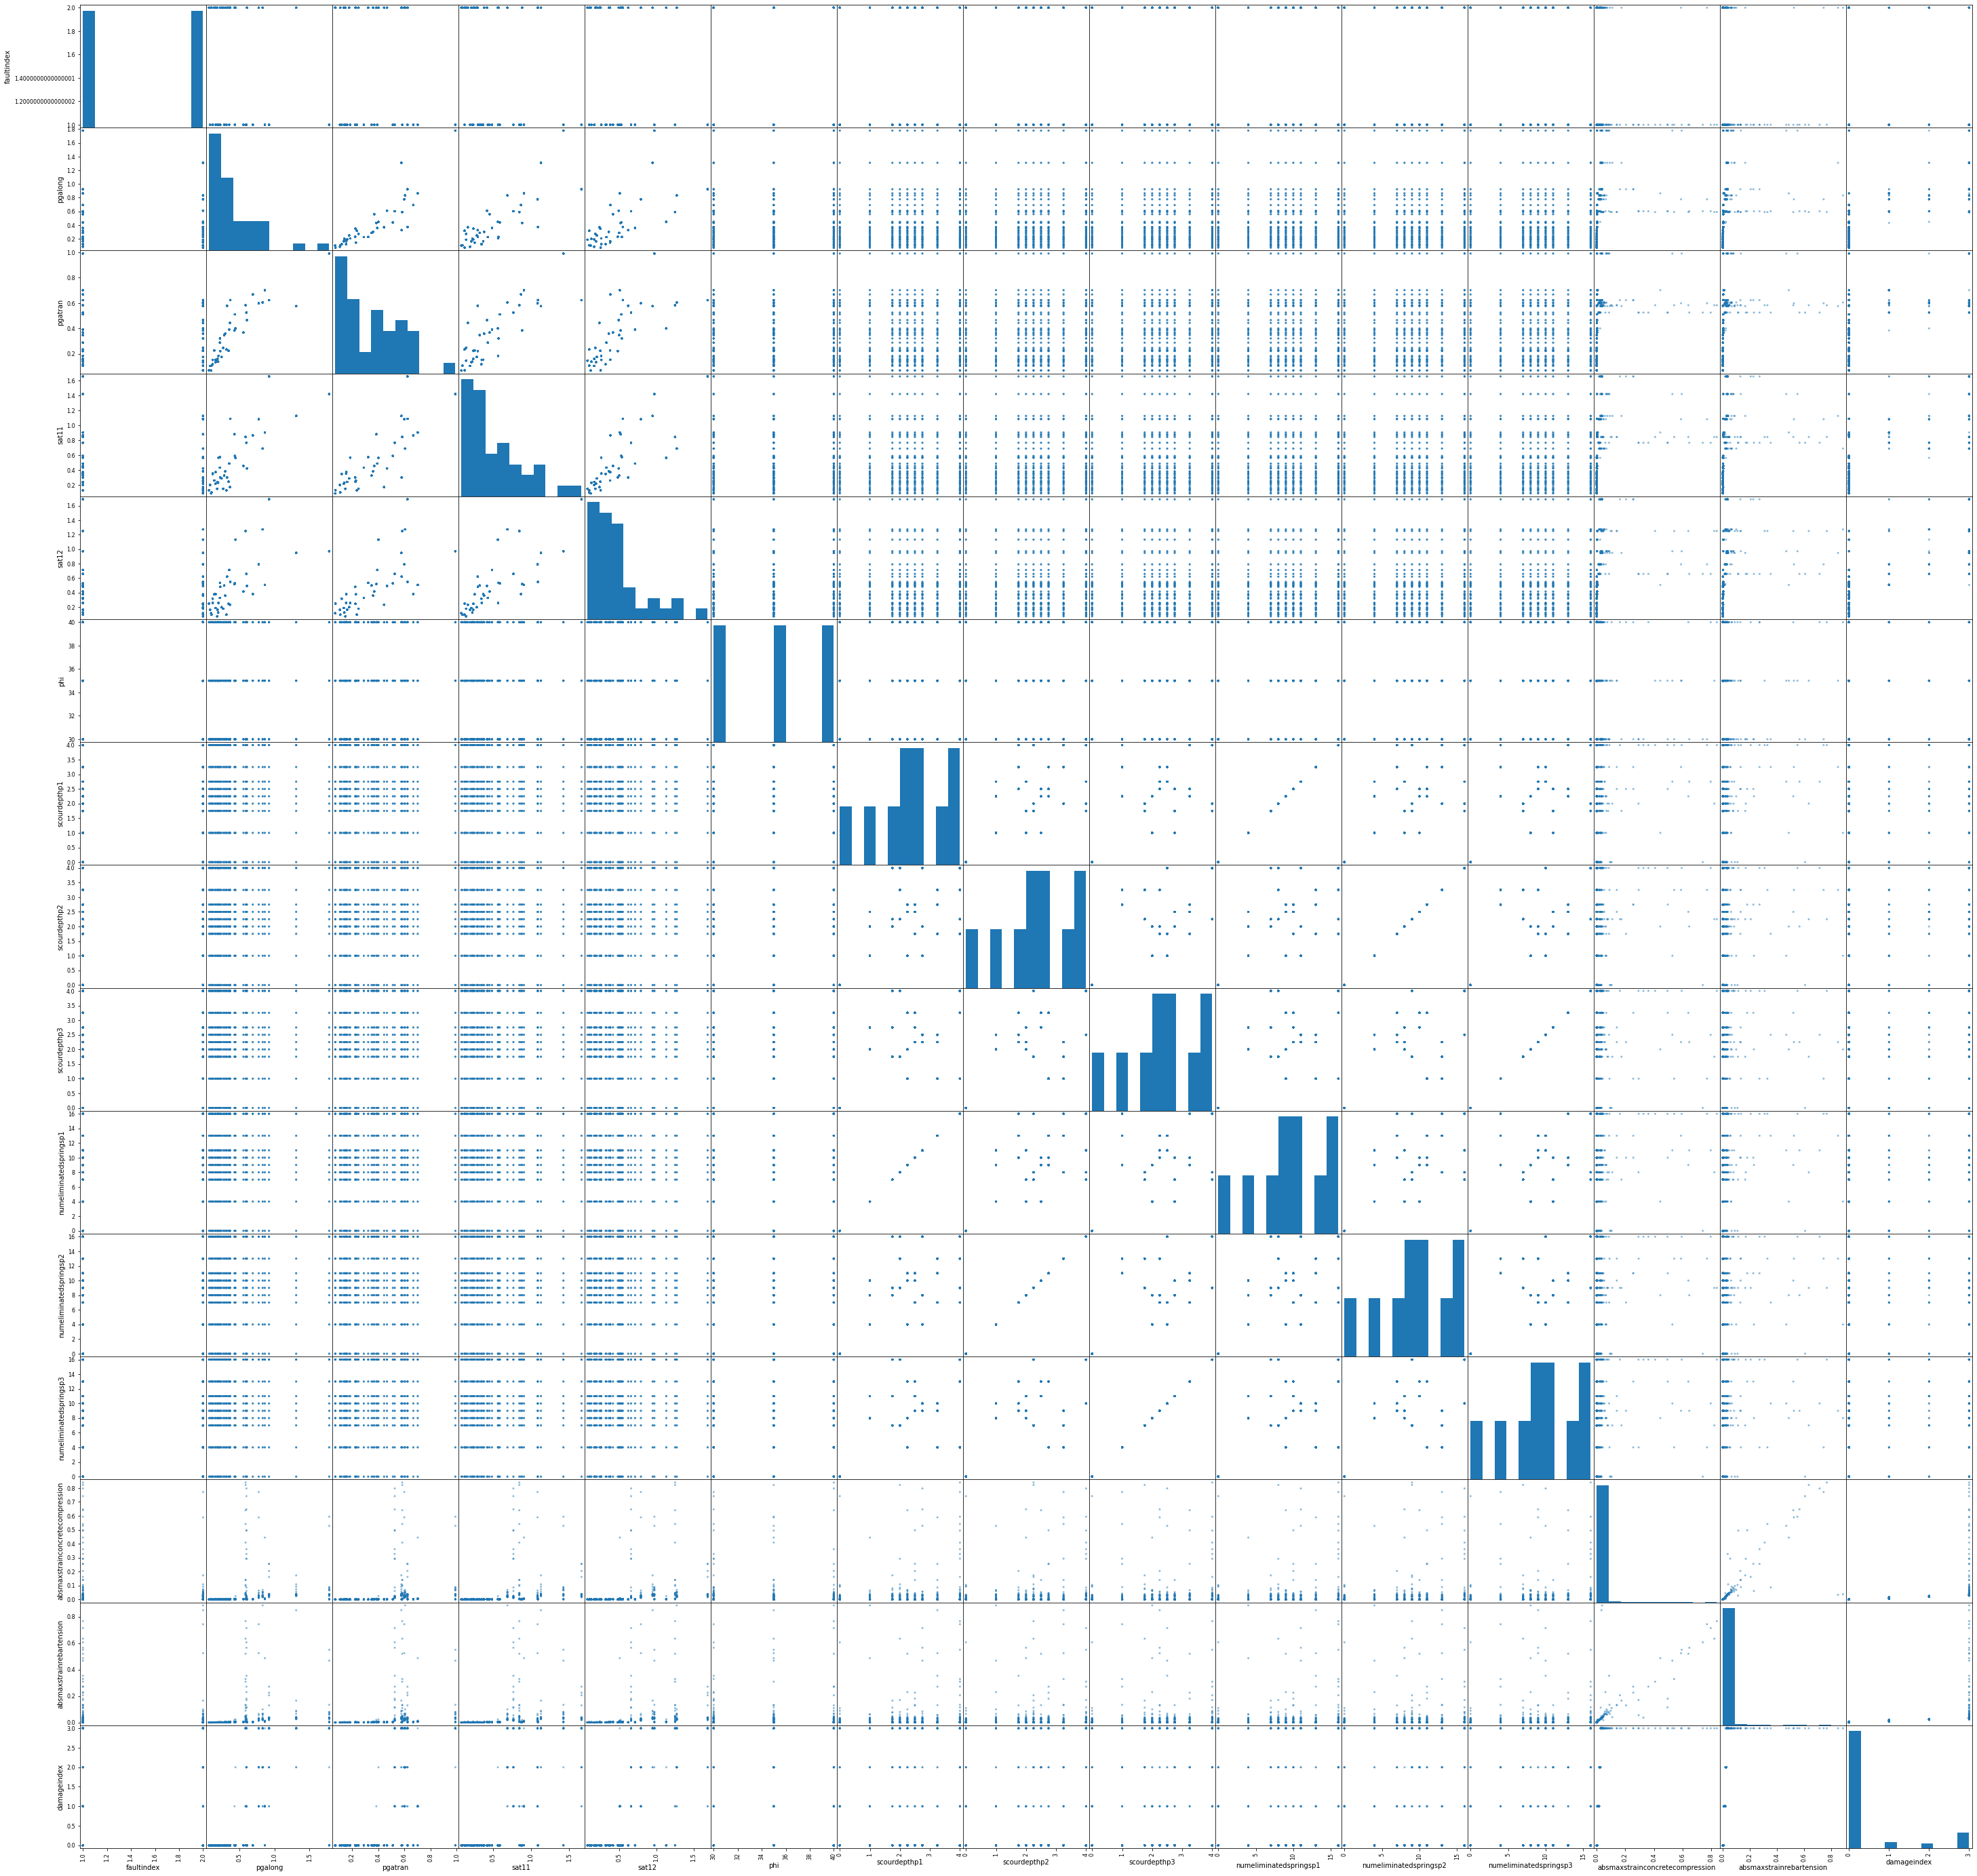

In [47]:
from pandas.plotting import scatter_matrix
Numerical_chart=['faultindex','pgalong','pgatran','sat11','sat12','phi','scourdepthp1','scourdepthp2','scourdepthp3','numeliminatedspringsp1', 'numeliminatedspringsp2', 'numeliminatedspringsp3' , 'absmaxstrainconcretecompression' , 'absmaxstrainrebartension' , 'damageindex' ]
scatter_matrix(dfi[Numerical_chart],figsize=(50,50))

# Turn table (pandas) into array (numpy & sklearn):

In [15]:
dfi.columns

Index(['faultindex', 'pgalong', 'pgatran', 'sat11', 'sat12', 'phi',
       'scourdepthp1', 'scourdepthp2', 'scourdepthp3',
       'numeliminatedspringsp1', 'numeliminatedspringsp2',
       'numeliminatedspringsp3', 'absmaxstrainconcretecompression',
       'absmaxstrainrebartension', 'damageindex'],
      dtype='object')

In [16]:
X = dfi [['faultindex', 'pgalong', 'pgatran', 'sat11', 'sat12', 'phi','scourdepthp1', 'scourdepthp2', 'scourdepthp3','numeliminatedspringsp1', 'numeliminatedspringsp2','numeliminatedspringsp3', 'absmaxstrainconcretecompression','absmaxstrainrebartension']].values
X[0:5]

array([[1.00000e+00, 2.86000e-01, 3.48000e-01, 3.28770e-01, 4.97790e-01,
        3.00000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 8.39060e-04, 7.60323e-04],
       [1.00000e+00, 2.86000e-01, 3.48000e-01, 3.28770e-01, 4.97790e-01,
        3.00000e+01, 2.75000e+00, 2.00000e+00, 2.25000e+00, 1.10000e+01,
        8.00000e+00, 9.00000e+00, 8.68774e-04, 8.02166e-04],
       [1.00000e+00, 2.86000e-01, 3.48000e-01, 3.28770e-01, 4.97790e-01,
        3.00000e+01, 3.25000e+00, 1.75000e+00, 2.50000e+00, 1.30000e+01,
        7.00000e+00, 1.00000e+01, 8.75760e-04, 7.96042e-04],
       [1.00000e+00, 2.86000e-01, 3.48000e-01, 3.28770e-01, 4.97790e-01,
        3.00000e+01, 2.25000e+00, 1.00000e+00, 2.00000e+00, 9.00000e+00,
        4.00000e+00, 8.00000e+00, 8.60541e-04, 7.64104e-04],
       [1.00000e+00, 2.86000e-01, 3.48000e-01, 3.28770e-01, 4.97790e-01,
        3.00000e+01, 2.00000e+00, 4.00000e+00, 4.00000e+00, 8.00000e+00,
        1.60000e+01, 1.600

In [17]:
y = dfi ['damageindex'].values
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

# Preprocessing and normalizing

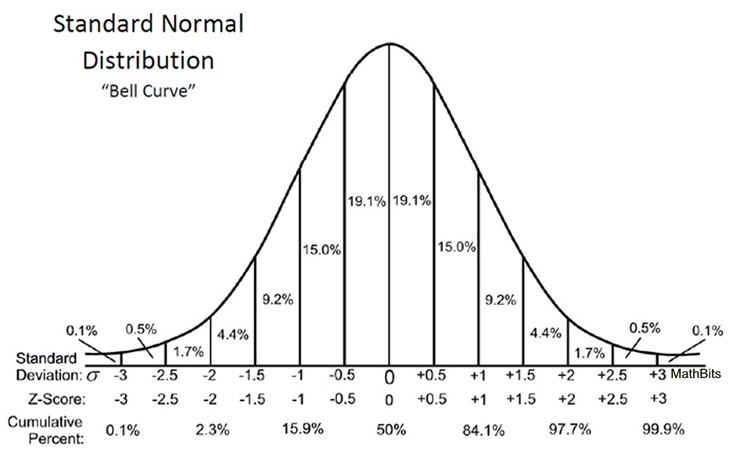

In [22]:
# first take a look at the original quantities (before normalization) in the dataset
# then normalize by "preprocessing.StandardScaler().fit(X)" 
# after all, take a look at the normalized dataset
# the reason for normalizing is to balance the value of the different features and give them similar weights
# for example you can not compare compression of concrete 0.0004 with pga which is 1.7 so we have to normalize them

print('original data :\n')
print(X[0:5])
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X.astype(float))
print('\nnormalized data:\n')
print(X[0:5])

original data :

[[-1.         -0.37129205 -0.0362621  -0.49030144  0.04032102 -1.22474487
  -1.96688878 -1.96688878 -1.96688878 -1.96688878 -1.96688878 -1.96688878
  -0.19712794 -0.20207191]
 [-1.         -0.37129205 -0.0362621  -0.49030144  0.04032102 -1.22474487
   0.33478958 -0.29294088 -0.0836974   0.33478958 -0.29294088 -0.0836974
  -0.19673177 -0.20149422]
 [-1.         -0.37129205 -0.0362621  -0.49030144  0.04032102 -1.22474487
   0.75327656 -0.50218437  0.12554609  0.75327656 -0.50218437  0.12554609
  -0.19663863 -0.20157877]
 [-1.         -0.37129205 -0.0362621  -0.49030144  0.04032102 -1.22474487
  -0.0836974  -1.12991483 -0.29294088 -0.0836974  -1.12991483 -0.29294088
  -0.19684154 -0.20201971]
 [-1.         -0.37129205 -0.0362621  -0.49030144  0.04032102 -1.22474487
  -0.29294088  1.38100702  1.38100702 -0.29294088  1.38100702  1.38100702
  -0.19650432 -0.2007192 ]]

normalized data:

[[-1.         -0.37129205 -0.0362621  -0.49030144  0.04032102 -1.22474487
  -1.96688878 -

# Train test split:

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
# "Do not change the random state". random state is a command that shuffles the data in a certain manner.
# so changing the random state will change the shuffeling which leads to big changes in the final results
# we want the changes be constant each time we run the program
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (960, 14) (960,)
Test set: (240, 14) (240,)


# Classification by K-Nearest Neighbor (KNN):

In [24]:
# importing knn from sklearn
from sklearn.neighbors import KNeighborsClassifier

In [25]:
# Training :
# for the first try we take k = 4 (number of neighbors)
k = 4
#Train the Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [26]:
# Prediction:
# ok , now that the model is trained, we should predict the target values (Damage State) known as yhat in this program
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [29]:
# lets check and compare some rows of  " y : actual damage state" and "yhat: predicted damage state" by our model
# first 10 rows
print('predicted damage state:')
print(yhat[0:10])
print('\n')
print('actual damage state:')
print(y[0:10])

predicted damage state:
[0 0 0 0 0 0 0 0 0 3]


actual damage state:
[0 0 0 0 0 0 0 0 0 0]


In [32]:
# As it is obvious, the performance and percision of the model seem good  :) 
# so lets evaluate the accuracy of the model 
from sklearn import metrics
# precision on the traning data
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
# precision on the test data and the predicted data
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9354166666666667
Test set Accuracy:  0.9


In [55]:
# now lets try other number of neighbors (k), for example 1-10 in order to see which k gives us the best answer
# note that low number of neighbors causes overfit because it take only one nearest neighbor 
# (too similar to its neighbor, not some neighbors. your one nearest neighbor may not look like you :D )
# also, high number of neighbors causes underfit because it considers all of the datapoints near our target and it 
# would be a very general and low-accuracy model


Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.84583333, 0.85416667, 0.8875    , 0.9       , 0.9       ,
       0.89583333, 0.89583333, 0.8875    , 0.88333333])

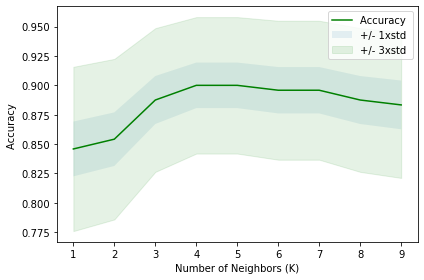

In [56]:
# Plot the model accuracy for a different number of neighbors.
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [57]:
# In conclusion, the best accuracy is for k = 4
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9 with k= 4


# Giving new data to the program for evaluating the model:

In [69]:
dfi.describe()

,faultindex,pgalong,pgatran,sat11,sat12,phi,scourdepthp1,scourdepthp2,scourdepthp3,numeliminatedspringsp1,numeliminatedspringsp2,numeliminatedspringsp3,absmaxstrainconcretecompression,absmaxstrainrebartension,damageindex
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,1.500000,0.415013,0.355819,0.511943,0.483070,35.000000,2.350000,2.350000,2.350000,9.400000,9.400000,9.400000,0.015624,0.015397,0.431667
std,0.500208,0.347617,0.215721,0.373748,0.365216,4.084185,1.195278,1.195278,1.195278,4.781114,4.781114,4.781114,0.075035,0.072462,0.982073
min,1.000000,0.070830,0.069000,0.088460,0.072070,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000129,0.000000,0.000000
25%,1.000000,0.189625,0.158892,0.240393,0.223765,30.000000,1.750000,1.750000,1.750000,7.000000,7.000000,7.000000,0.000436,0.000238,0.000000
50%,1.500000,0.309300,0.334900,0.380045,0.378835,35.000000,2.375000,2.375000,2.375000,9.500000,9.500000,9.500000,0.000871,0.000818,0.000000
75%,2.000000,0.566942,0.538052,0.710035,0.565998,40.000000,3.250000,3.250000,3.250000,13.000000,13.000000,13.000000,0.002386,0.003191,0.000000
max,2.000000,1.779420,0.990240,1.658880,1.688240,40.000000,4.000000,4.000000,4.000000,16.000000,16.000000,16.000000,0.839528,0.886159,3.000000


In [74]:
# give the model a new sample and see what the result is.
# The seqence of entering the data is :

# note that ML models work based on the range of the train data, so try to give it the new data
# in the range of min to max for every input feature

# ------------------------------------------------------------------------------------

# name of the feature(inputs):
# faultindex
# pgalong
# pgatran
# sat11
# sat12
# phi
# scourdepthp1
# scourdepthp2
# scourdepthp3
# numeliminatedspringsp1
# numeliminatedspringsp2
# numeliminatedspringsp3
# absmaxstrainconcretecompression
# absmaxstrainrebartension


# The output shows : damageindex                        

# ------------------------------------------------------------------------------------

newx1 = [[1.00,
          1.60,
          0.88,
          1.20,
          1.57,
          1.60,
          40.00, 
          4.00, 
          3.00, 
          10.00, 
          10.00,
          10.00, 
          0.70, 
          0.70, 
                ]]

# we have to scale it first, we made a scaler, so lets use it
scaled_newx1 = scaler.transform(newx1)
print('The Damage state of the given sample is : ')
neigh.predict(scaled_newx1)

The Damage state of the given sample is : 


array([3], dtype=int64)

# Evaluation:

In [83]:
# f1_score : 

from sklearn.metrics import f1_score
print("f1_score : ")
f1_score(y_test, yhat, average='weighted')

f1_score : 


0.848988253995567

In [94]:
# jaccard_score : 

from sklearn.metrics import jaccard_score
print("jaccard_score : ")
jaccard_score(y_test, yhat , average='weighted',pos_label=0)

jaccard_score : 


C:\Users\arefj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


0.7949386845039019

In [86]:
# confusion_matrix :

from sklearn.metrics import classification_report, confusion_matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))



              precision    recall  f1-score   support

           0       0.91      0.99      0.95       189
           1       0.00      0.00      0.00        12
           2       0.33      0.09      0.14        11
           3       0.77      0.86      0.81        28

    accuracy                           0.88       240
   macro avg       0.50      0.48      0.48       240
weighted avg       0.82      0.88      0.85       240



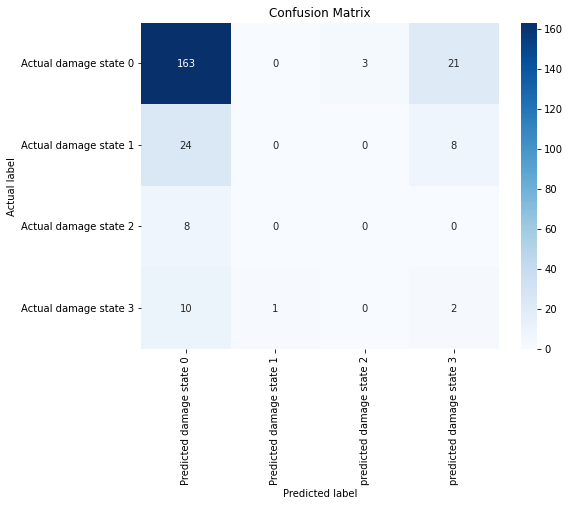

In [95]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted damage state 0', 'Predicted damage state 1' , 'predicted damage state 2' , 'predicted damage state 3'], yticklabels=['Actual damage state 0', 'Actual damage state 1', 'Actual damage state 2' , 'Actual damage state 3'])
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix')
plt.show()

In [93]:
# extracting actual and predicted by:
# Create a DataFrame with 'y' and 'yhat'
knndata = pd.DataFrame({'Actual': y, 'Predicted': yhat})

# Save the DataFrame to a CSV file
knndata.to_csv('e:/predictionsofknn.csv', index=False)


# Conclusion & Report : 

#### Based on the evaluations conducted on the model, although the model has a good accuracy confusion, matrix shows that the prediction only works well when the damage state is equal to zero and this level of accuracy has been caused by the high number of damage state = 0. 
#### In our dataset we have DS=0 : 982 , DS=1 : 49 , DS=2 : 38 , DS=3 : 131 . Therefore, it makes the model work well on the data where DS = 0. However, in other DS, due to the lack of sufficient data, the model is not able to predict the other DS as good as DS=0. As mentioned above, the obtained high accuracy is because of inconsistency and focus of targets in one category(i.e., DS = 0) . In this situation, the model assumes the DS=1,2,3 as noises. 
#### In conclusion, the KNN could not predict the category of Damage State very well, despite high values of precision indices.